In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [25]:
mnist = input_data.read_data_sets('mnist/', one_hot = True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [0]:
x_treinamento = mnist.train.images
y_treinamento = mnist.train.labels
x_teste = mnist.test.images
y_teste = mnist.test.labels

In [0]:
x_teste[0]

In [0]:
y_treinamento

In [0]:
y_treinamento[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

Text(0.5,1,'Classe:4')

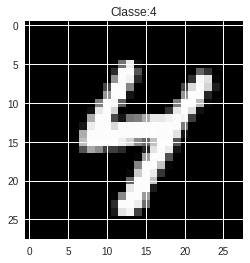

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.imshow(x_treinamento[101].reshape((28, 28)), cmap='gray')
plt.title('Classe:'+str(np.argmax(y_treinamento[101])))

In [22]:
x_batch, y_batch = mnist.train.next_batch(128)
x_batch.shape

(128, 784)

In [0]:
neuronios_entrada = x_treinamento.shape[1]

In [20]:
neuronios_oculta1 = int((x_treinamento.shape[1] + y_treinamento.shape[1]) / 2)
neuronios_oculta1

397

In [9]:
neuronios_oculta2 = neuronios_oculta1
neuronios_oculta3 = neuronios_oculta1
neuronios_saida = y_treinamento.shape[1]
neuronios_saida


10

In [0]:
import tensorflow as tf

In [0]:
w = {'oculta1': tf.Variable(tf.random_normal([neuronios_entrada, neuronios_oculta1])),
     'oculta2': tf.Variable(tf.random_normal([neuronios_oculta1, neuronios_oculta2])),
     'oculta3': tf.Variable(tf.random_normal([neuronios_oculta2, neuronios_oculta3])),
     'saida': tf.Variable(tf.random_normal([neuronios_oculta3, neuronios_saida]))
    }

In [0]:
b = {'oculta1': tf.Variable(tf.random_normal([neuronios_oculta1])),
     'oculta2': tf.Variable(tf.random_normal([neuronios_oculta2])),
     'oculta3': tf.Variable(tf.random_normal([neuronios_oculta3])),
     'saida': tf.Variable(tf.random_normal([neuronios_saida]))
    }

In [0]:
xph = tf.placeholder('float', [None, neuronios_entrada])
yph = tf.placeholder('float', [None, neuronios_saida])

In [0]:
def mlp(x, w, bias):
  camada_oculta1 = tf.nn.relu(tf.add(tf.matmul(x, w['oculta1']),bias['oculta1']))
  camada_oculta2 = tf.nn.relu(tf.add(tf.matmul(camada_oculta1, w['oculta2']),bias['oculta2']))
  camada_oculta3 = tf.nn.relu(tf.add(tf.matmul(camada_oculta2, w['oculta3']),bias['oculta3']))
  camada_saida = tf.add(tf.matmul(camada_oculta3, w['saida']), bias['saida'])
  return camada_saida

In [0]:
modelo = mlp(xph, w, b)
erro = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=modelo, labels=yph))
otimizador = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(erro)                      

In [0]:
previsoes = tf.nn.softmax(modelo)
previsoes_corretas = tf.equal(tf.argmax(previsoes, 1), tf.argmax(yph, 1))
taxa_acerto = tf.reduce_mean(tf.cast(previsoes_corretas, tf.float32))

In [0]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoca in range(10000):
    x_batch, y_batch = mnist.train.next_batch(128)
    _, custo = sess.run([otimizador, erro], feed_dict = {xph: x_batch, yph:y_batch})
    if epoca % 100 == 0:
      acc = sess.run([taxa_acerto], feed_dict = {xph: x_batch, yph:y_batch})
      print('Epoca:'+str(epoca+1)+' Erro:'+str(custo)+' Acc:'+str(acc))
  print('Treinamento Concluído')
  print(sess.run(taxa_acerto, feed_dict={xph: x_teste,yph: y_teste}))